In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport
import math
import re
%matplotlib inline
import chart_studio.plotly as py
import plotly.offline as py
from plotly.offline import iplot
from plotly import tools
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import geopandas as gpd
from shapely.geometry import Point
import folium
import branca.colormap as cm
from folium.plugins import HeatMap
import sys
import squarify

# Data Preparation and Exploration

In [2]:
#Create new csv for all month for listings detailed dataset
listings_4_2020 = pd.read_csv('listings_4_20.csv.gz', compression='gzip',
                   error_bad_lines=False)
listings_5_2020 = pd.read_csv('listings_5_20.csv.gz', compression='gzip',
                   error_bad_lines=False)
listings_6_2020 = pd.read_csv('listings_6_20.csv.gz', compression='gzip',
                   error_bad_lines=False)
listings_10_2020 = pd.read_csv('listings_10_20.csv.gz', compression='gzip',
                   error_bad_lines=False)
listings_11_2020 = pd.read_csv('listings_11_20.csv.gz', compression='gzip',
                   error_bad_lines=False)
listings_12_2020 = pd.read_csv('listings_12_20.csv.gz', compression='gzip',
                   error_bad_lines=False)
listings_1_2021 = pd.read_csv('listings_1_21.csv.gz', compression='gzip',
                   error_bad_lines=False)
listings_2_2021 = pd.read_csv('listings_2_21.csv.gz', compression='gzip',
                   error_bad_lines=False)
listings_3_2021 = pd.read_csv('listings_3_21.csv.gz', compression='gzip',
                   error_bad_lines=False)

In [3]:
listings_merge = [listings_4_2020,
                 listings_5_2020,
                 listings_6_2020,
                 listings_10_2020,
                 listings_11_2020,
                 listings_12_2020,
                 listings_1_2021,
                 listings_2_2021,
                 listings_3_2021]

listings = pd.concat(listings_merge)

In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms_text,number_of_reviews_l30d
0,8521,https://www.airbnb.com/rooms/8521,20200428151650,2020-04-29,SunsplashedSerenity walk to Harvard & Fresh Pond,"An elegant, sun-splashed, 2 bedroom (+2offices...","An elegant, sun-splashed, 2+ bedroom apartment...","An elegant, sun-splashed, 2 bedroom (+2offices...",none,Huron Village is known for its charm. We have...,...,strict_14_with_grace_period,f,f,3,3,0,0,0.25,NaN,NaN
1,11169,https://www.airbnb.com/rooms/11169,20200428151650,2020-04-29,Lovely Studio Room: Thu-Mons Near Universities!,Large sunny room which comfortably fits a coup...,"We have a peaceful, large, sunny room w/ attac...",Large sunny room which comfortably fits a coup...,none,The neighborhood is quiet and friendly and our...,...,strict_14_with_grace_period,t,t,2,0,2,0,1.18,NaN,NaN
2,11945,https://www.airbnb.com/rooms/11945,20200428151650,2020-04-29,Near Harvard: Safe & Lovely Room,Room next to kitchen and living room in wonder...,"Quiet peaceful room w/shared marble bath, wifi...",Room next to kitchen and living room in wonder...,none,Amazing neighborhood: Quiet yet close walk to ...,...,strict_14_with_grace_period,t,t,2,0,2,0,0.27,NaN,NaN
3,19581,https://www.airbnb.com/rooms/19581,20200428151650,2020-04-28,"Furnished suite, Windsor","Welcome to Area IV! We are located, convenient...","Furnished suite at the Windsor Inn, Cambridge....","Welcome to Area IV! We are located, convenient...",none,NaN,...,strict_14_with_grace_period,f,f,3,0,3,0,0.05,NaN,NaN
4,22006,https://www.airbnb.com/rooms/22006,20200428151650,2020-04-29,B & B near Harvard's Quad Houses,Your choice (depending on availability) of one...,"Comfortable, convenient B&B at the north end o...",Your choice (depending on availability) of one...,none,"We're in a beautiful neighborhood, with nearby...",...,moderate,f,f,1,0,1,0,0.89,NaN,NaN


In [5]:
listings.info(108)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7866 entries, 0 to 816
Data columns (total 108 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    id                                            int64  
 1    listing_url                                   object 
 2    scrape_id                                     int64  
 3    last_scraped                                  object 
 4    name                                          object 
 5    summary                                       object 
 6    space                                         object 
 7    description                                   object 
 8    experiences_offered                           object 
 9    neighborhood_overview                         object 
 10   notes                                         object 
 11   transit                                       object 
 12   access                                        o

In [6]:
listings['last_review'] = pd.to_datetime(listings['last_review'])
listings = listings[(listings['last_review'] >= '2020-04-01')]
listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms_text,number_of_reviews_l30d
33,1193862,https://www.airbnb.com/rooms/1193862,20200428151650,2020-04-28,Middle Room in Shared Apt,If you are bringing a car you must let us know...,** Please note there has been some confusion l...,If you are bringing a car you must let us know...,none,NaN,...,flexible,f,f,3,0,3,0,1.49,NaN,NaN
34,1193875,https://www.airbnb.com/rooms/1193875,20200428151650,2020-04-28,Large Downstairs Room,If you are bringing a car you must let us know...,** Please note there has been some confusion l...,If you are bringing a car you must let us know...,none,NaN,...,strict_14_with_grace_period,f,f,3,0,3,0,1.98,NaN,NaN
38,1225831,https://www.airbnb.com/rooms/1225831,20200428151650,2020-04-28,Victorian Charm MIT/Harvard/Kendall/Central-1BR,"Welcome to our 100-year-old house! Cozy, frien...","First off, in these days of divisiveness, we s...","Welcome to our 100-year-old house! Cozy, frien...",none,"Despite our urban setting, our neighborhood is...",...,moderate,f,f,1,1,0,0,5.12,NaN,NaN
40,1307195,https://www.airbnb.com/rooms/1307195,20200428151650,2020-04-28,Harvard and MIT - Enjoy Comfort and Convenience!,Stay in the heart of Cambridge in our beautifu...,This sun filled flat is the ideal Cambridge lo...,Stay in the heart of Cambridge in our beautifu...,none,Our neighborhood is one of the most exciting i...,...,moderate,f,f,1,1,0,0,6.11,NaN,NaN
61,1984737,https://www.airbnb.com/rooms/1984737,20200428151650,2020-04-29,Charming Harvard Victorian,Charming Victorian a 10 minute walk or 5 min t...,This beautiful 125+ year old home offers appro...,Charming Victorian a 10 minute walk or 5 min t...,none,Nestled up to Harvard and surrounds the neighb...,...,flexible,t,t,2,2,0,0,4.07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,47538101,https://www.airbnb.com/rooms/47538101,20210325145911,2021-03-26,SoloPrivate Space,NaN,NaN,This Apt in the heart of Cambridge. Only 8 min...,NaN,"MIT,Harvard,downtown boston,Fenway park,airpor...",...,NaN,NaN,NaN,2,2,0,0,2.05,1 bath,2.0
777,47703691,https://www.airbnb.com/rooms/47703691,20210325145911,2021-03-25,ENTIRE APT: Bright Sun Drenched Spot in Cambri...,NaN,NaN,Located right in the heart of Inman Square in ...,NaN,Centrally located near all the best restaurant...,...,NaN,NaN,NaN,1,1,0,0,3.00,1 bath,3.0
784,48107460,https://www.airbnb.com/rooms/48107460,20210325145911,2021-03-26,I2 Private Room by Kendall Sq,NaN,NaN,"Our house is close to Harvard, MIT Kendall Squ...",NaN,NaN,...,NaN,NaN,NaN,3,0,3,0,2.00,1 shared bath,2.0
785,48108594,https://www.airbnb.com/rooms/48108594,20210325145911,2021-03-26,Private room next to MIT/Harvard 3,NaN,NaN,"Our house is close to Harvard, MIT Kendall Squ...",NaN,NaN,...,NaN,NaN,NaN,3,0,3,0,0.77,1.5 shared baths,0.0


In [7]:
#checking the nulls for each feature
print(listings.isnull().sum().any())
listings.isnull().sum().sort_values(ascending=False)

True


neighbourhood_group_cleansed    2125
xl_picture_url                  2125
medium_url                      2125
thumbnail_url                   2125
square_feet                     2122
                                ... 
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
id                                 0
Length: 108, dtype: int64

In [8]:
listings_no_nulls = set(listings.columns[listings.isnull().mean()==0]) 
print(listings_no_nulls)

{'host_id', 'maximum_minimum_nights', 'review_scores_location', 'host_verifications', 'availability_30', 'latitude', 'review_scores_communication', 'maximum_nights_avg_ntm', 'price', 'availability_365', 'last_review', 'minimum_minimum_nights', 'scrape_id', 'minimum_maximum_nights', 'longitude', 'instant_bookable', 'accommodates', 'maximum_maximum_nights', 'calculated_host_listings_count_private_rooms', 'property_type', 'calculated_host_listings_count_shared_rooms', 'minimum_nights', 'amenities', 'has_availability', 'review_scores_rating', 'calendar_last_scraped', 'review_scores_value', 'review_scores_accuracy', 'host_url', 'maximum_nights', 'neighbourhood_cleansed', 'name', 'room_type', 'picture_url', 'first_review', 'calculated_host_listings_count_entire_homes', 'listing_url', 'availability_60', 'number_of_reviews_ltm', 'minimum_nights_avg_ntm', 'review_scores_cleanliness', 'review_scores_checkin', 'availability_90', 'last_scraped', 'id', 'reviews_per_month', 'number_of_reviews', 'cal

In [9]:
listings_columns = ['id', 'host_name', 
               'host_is_superhost', 'neighbourhood_cleansed',
               'zipcode', 'property_type', 'room_type',
               'accommodates', 'bathrooms', 'bedrooms',
               'beds', 'amenities', 'price', 'cleaning_fee',
               'number_of_reviews', 'review_scores_rating', 'instant_bookable',
               'cancellation_policy', 'reviews_per_month', 'latitude', 'longitude']

In [10]:
listings = listings[listings_columns]
print(listings.shape)
listings.sample(10)

(2125, 21)


,id,host_name,host_is_superhost,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,...,amenities,price,cleaning_fee,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,latitude,longitude
146,7872594,Dawn,t,Mid-Cambridge,NaN,Entire guest suite,Entire home/apt,2,NaN,1.0,...,"[""Wifi"", ""Cooking basics"", ""Microwave"", ""Shamp...",$114.00,NaN,25,98.0,f,NaN,0.39,42.37537,-71.10695
710,46244582,Liya,f,West Cambridge,NaN,Entire apartment,Entire home/apt,4,NaN,3.0,...,"[""Wifi"", ""Dedicated workspace"", ""Hot water"", ""...",$133.00,NaN,6,97.0,f,NaN,1.86,42.37354,-71.12241
61,2538983,Dan,f,Cambridgeport,NaN,Entire apartment,Entire home/apt,4,NaN,2.0,...,"[""Hangers"", ""Wifi"", ""Dishes and silverware"", ""...",$213.00,NaN,370,97.0,t,NaN,5.37,42.35704,-71.10909
158,7881324,Dawn,t,Mid-Cambridge,NaN,Entire guest suite,Entire home/apt,3,NaN,1.0,...,"[""Microwave"", ""Stove"", ""Dedicated workspace"", ...",$118.00,NaN,21,99.0,f,NaN,0.34,42.37344,-71.10484
666,27090291,Paula,f,The Port,02139,Apartment,Private room,2,1.0,1.0,...,"{Wifi,""Air conditioning"",Heating,""Smoke detect...",$99.00,NaN,173,91.0,f,strict_14_with_grace_period,8.02,42.36658,-71.09283
434,27017697,John,f,Wellington-Harrington,NaN,Entire apartment,Entire home/apt,3,NaN,NaN,...,"[""Wifi"", ""Microwave"", ""Essentials"", ""Hot water...",$75.00,NaN,21,90.0,t,NaN,0.70,42.37173,-71.09180
548,34785693,Toby & Quinn,t,Cambridgeport,NaN,Entire apartment,Entire home/apt,4,NaN,2.0,...,"[""Dishes and silverware"", ""Essentials"", ""Air c...",$104.00,NaN,160,98.0,f,NaN,7.40,42.35589,-71.11012
339,20355928,Louisa,t,Mid-Cambridge,NaN,Entire condominium,Entire home/apt,2,NaN,1.0,...,"[""Freezer"", ""Dishes and silverware"", ""Keurig c...",$160.00,NaN,76,98.0,t,NaN,1.78,42.36770,-71.10584
124,6185544,Jurek,t,North Cambridge,NaN,Entire house,Entire home/apt,5,NaN,3.0,...,"[""Clothing storage: closet"", ""Dishes and silve...",$199.00,NaN,74,97.0,f,NaN,1.09,42.39633,-71.13642
481,30390003,Blueground,f,Area 2/MIT,NaN,Entire apartment,Entire home/apt,4,NaN,2.0,...,"[""Hangers"", ""Wifi"", ""Hot water"", ""Dryer"", ""Ove...",$220.00,NaN,1,100.0,t,NaN,0.10,42.36288,-71.08784


In [11]:
listings = listings.rename(columns={"neighbourhood_cleansed": "neighbourhood"})

In [12]:
print(listings.isnull().sum().any())
listings.isnull().sum().sort_values(ascending=False)

True


cleaning_fee            1815
zipcode                 1801
cancellation_policy     1801
bathrooms               1801
bedrooms                  82
beds                       5
host_is_superhost          5
host_name                  5
latitude                   0
reviews_per_month          0
instant_bookable           0
review_scores_rating       0
number_of_reviews          0
id                         0
price                      0
amenities                  0
accommodates               0
room_type                  0
property_type              0
neighbourhood              0
longitude                  0
dtype: int64

In [13]:
#dropping the features with many number of missing data
listings = listings.drop(['cleaning_fee', 'zipcode', 'cancellation_policy', 'bathrooms'], axis=1)

In [14]:
def impute_nan_category(listings,host_name):
     listings[host_name] = np.where(listings[host_name].isnull(),"Unknown",listings[host_name])
for Columns in ['host_name']:
    impute_nan_category(listings,Columns)

In [15]:
listings.price = listings.price.apply(lambda i: int(re.findall(r'\d+', i)[0]))

In [16]:
listings['host_is_superhost'] = listings['host_is_superhost'].map({'t': 1, 'f': 0})
listings['instant_bookable'] = listings['instant_bookable'].map({'t': 1, 'f': 0})

In [17]:
listings.fillna(listings.mean(), inplace=True)
listings.isnull().sum()

id                      0
host_name               0
host_is_superhost       0
neighbourhood           0
property_type           0
room_type               0
accommodates            0
bedrooms                0
beds                    0
amenities               0
price                   0
number_of_reviews       0
review_scores_rating    0
instant_bookable        0
reviews_per_month       0
latitude                0
longitude               0
dtype: int64

In [18]:
listings.dtypes

id                        int64
host_name                object
host_is_superhost       float64
neighbourhood            object
property_type            object
room_type                object
accommodates              int64
bedrooms                float64
beds                    float64
amenities                object
price                     int64
number_of_reviews         int64
review_scores_rating    float64
instant_bookable          int64
reviews_per_month       float64
latitude                float64
longitude               float64
dtype: object

In [19]:
listings['host_is_superhost'] = listings['host_is_superhost'].astype(int)
listings['instant_bookable'] = listings['instant_bookable'].astype(int)
listings['bedrooms'] = listings['bedrooms'].astype(int)
listings['beds'] = listings['beds'].astype(int)

In [20]:
listings.head()

,id,host_name,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month,latitude,longitude
33,1193862,Adam,0,The Port,Bed and breakfast,Private room,2,1,1,"{TV,Internet,Wifi,Kitchen,Heating,Washer,Dryer...",23,125,84.0,0,1.49,42.36494,-71.10054
34,1193875,Adam,0,The Port,Bed and breakfast,Private room,2,1,1,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",33,164,90.0,0,1.98,42.36433,-71.09911
38,1225831,Paul,1,The Port,Apartment,Entire home/apt,3,1,2,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",155,429,97.0,0,5.12,42.36458,-71.09845
40,1307195,Kyle,1,Cambridgeport,Apartment,Entire home/apt,6,3,3,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",469,420,96.0,1,6.11,42.36392,-71.10191
61,1984737,Steve,1,West Cambridge,House,Entire home/apt,10,4,5,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",425,293,95.0,1,4.07,42.38116,-71.13326


In [21]:
listings.dtypes.value_counts()

object     5
int64      4
float64    4
int32      4
dtype: int64

In [22]:
#Check unique values
listings.nunique().sort_values()

host_is_superhost          2
room_type                  2
instant_bookable           2
bedrooms                   6
beds                       8
accommodates              10
neighbourhood             13
property_type             22
review_scores_rating      29
host_name                201
price                    267
number_of_reviews        296
id                       431
latitude                 469
longitude                485
reviews_per_month        612
amenities               1951
dtype: int64

In [23]:
listings.describe()

,id,host_is_superhost,accommodates,bedrooms,beds,price,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month,latitude,longitude
count,2.125000e+03,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000,2125.000000
mean,2.349152e+07,0.449882,3.344471,1.449412,1.793882,127.964235,88.555765,94.312000,0.376000,2.325327,42.373070,-71.110030
std,1.379594e+07,0.497599,1.951851,0.767701,1.101642,97.030844,97.912127,9.056117,0.484494,1.967552,0.010102,0.017688
min,8.521000e+03,0.000000,1.000000,0.000000,0.000000,19.000000,1.000000,20.000000,0.000000,0.060000,42.355640,-71.155920
25%,1.316994e+07,0.000000,2.000000,1.000000,1.000000,60.000000,12.000000,92.000000,0.000000,0.660000,42.366080,-71.122880
50%,2.288803e+07,0.000000,3.000000,1.000000,2.000000,103.000000,54.000000,97.000000,0.000000,1.890000,42.370890,-71.107930
75%,3.371950e+07,1.000000,4.000000,2.000000,2.000000,162.000000,139.000000,99.000000,1.000000,3.510000,42.377780,-71.097680
max,4.815728e+07,1.000000,10.000000,5.000000,9.000000,950.000000,588.000000,100.000000,1.000000,10.860000,42.400210,-71.066360


In [24]:
# create a pandas-profiling report for better understanding of the dataset
#profile_elect = ProfileReport(listings, title='Listings Portfolio Report')
#profile_elect.to_file("listings_portfolio_report.html")

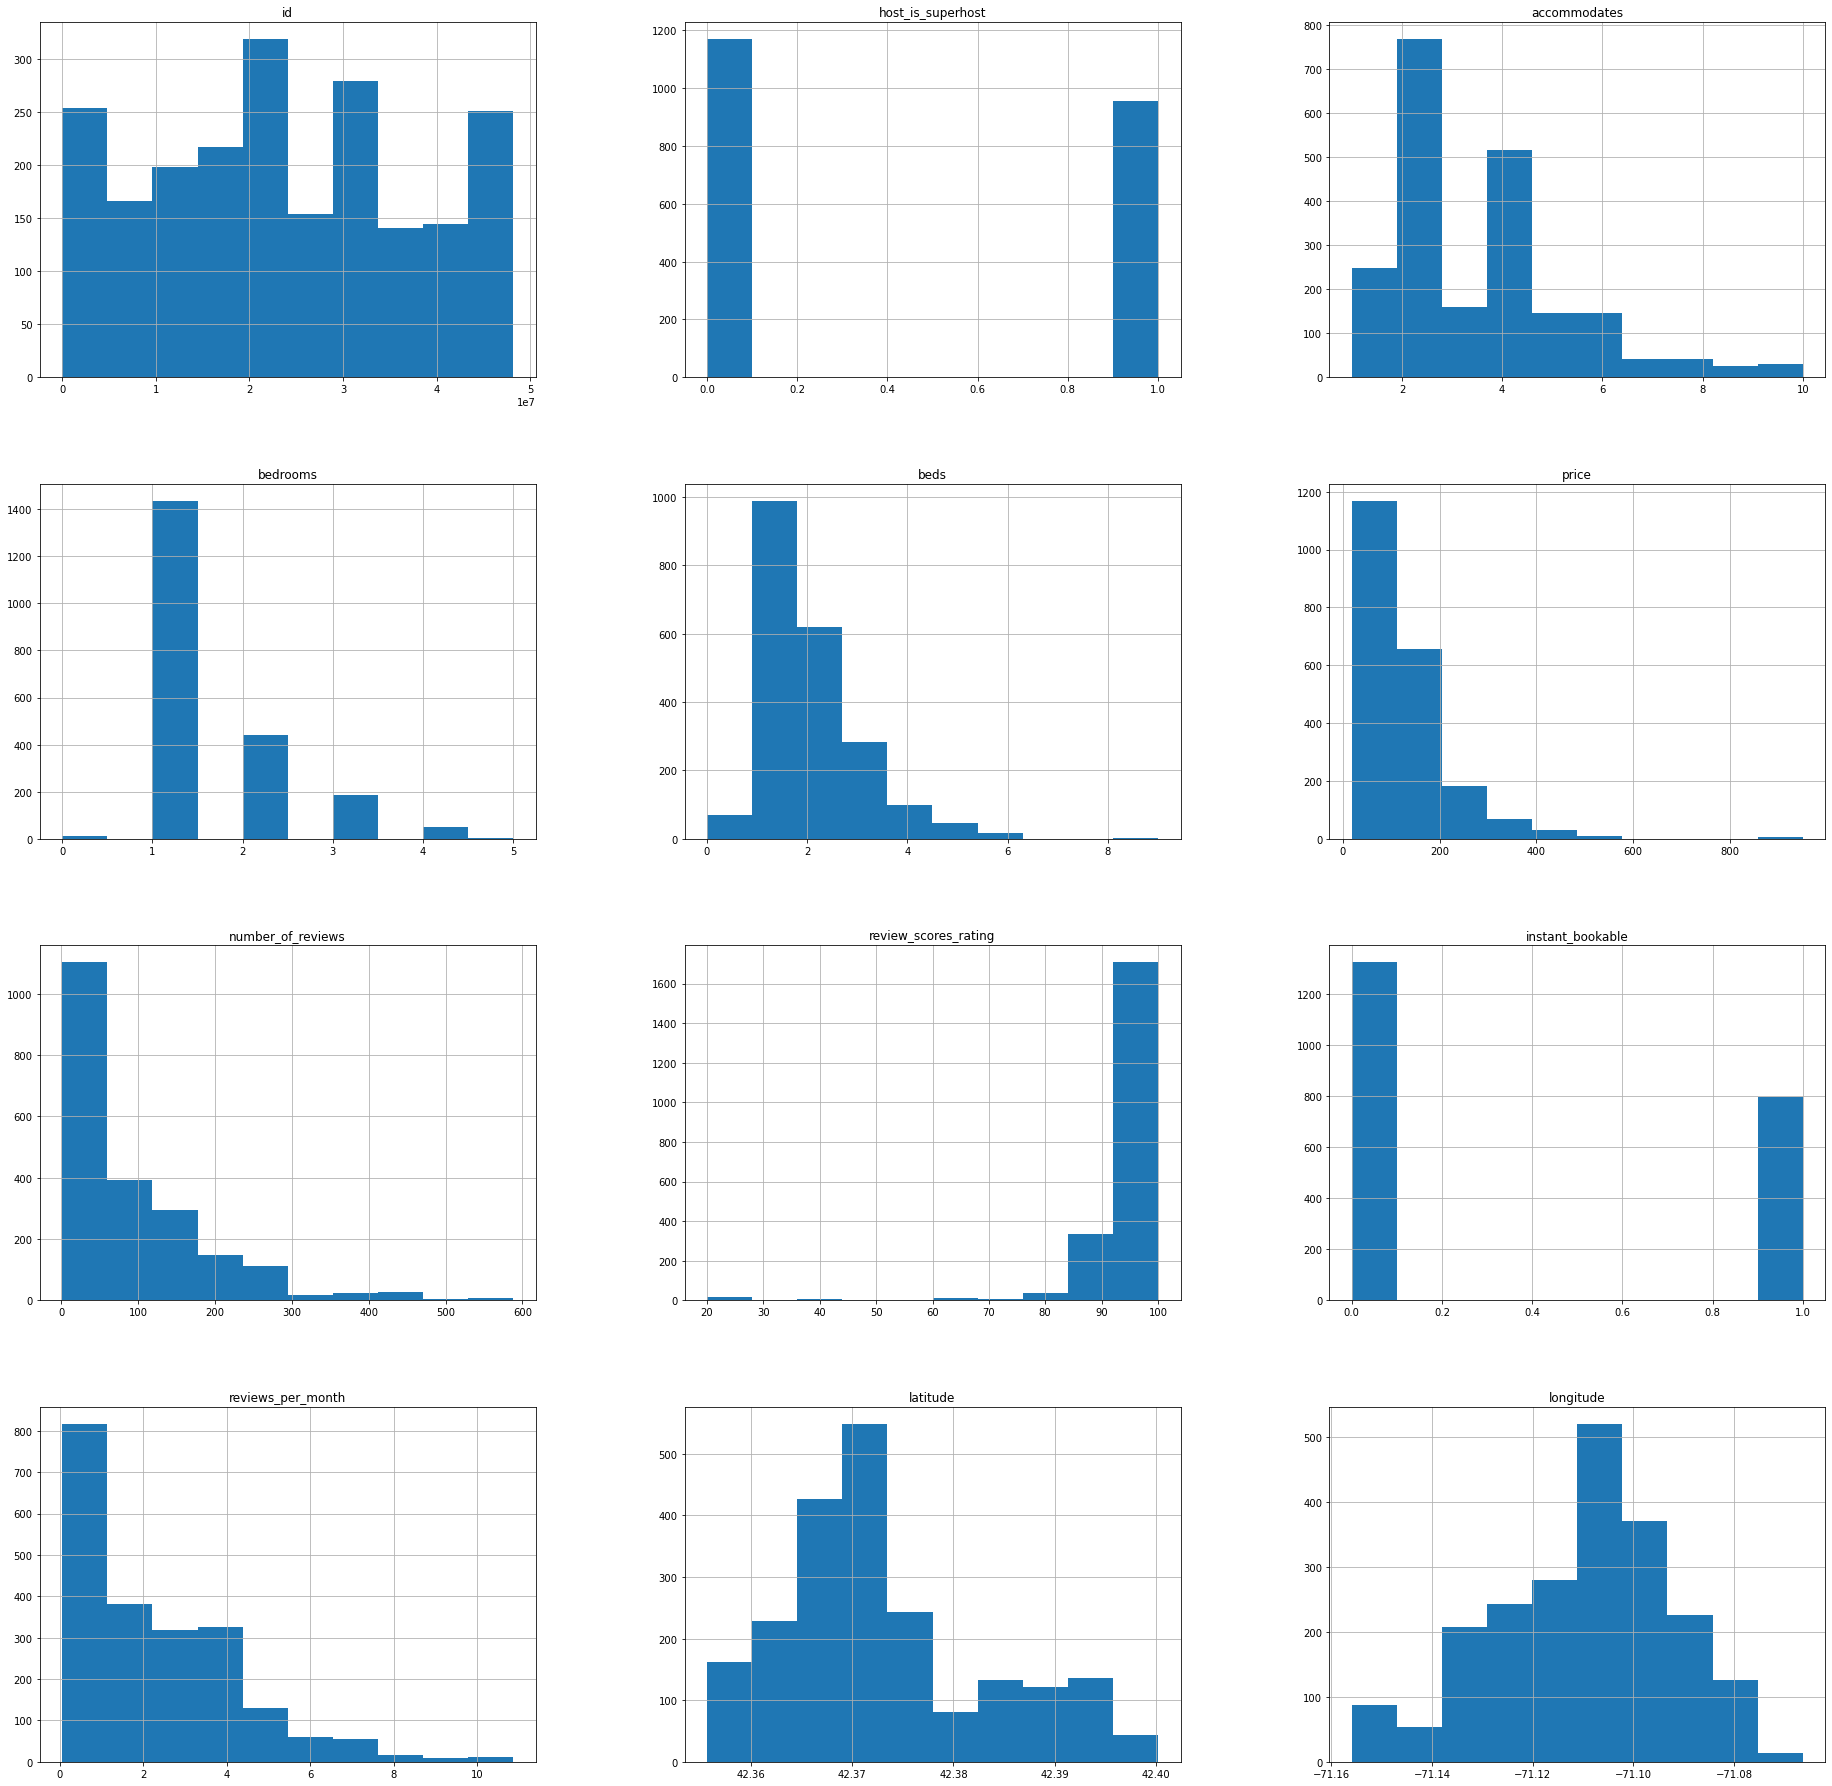

In [25]:
#Analyzing Numerical Variables
listings.hist(figsize=(32,32))
plt.show()

Text(0.5, 6.79999999999999, 'Price in $')

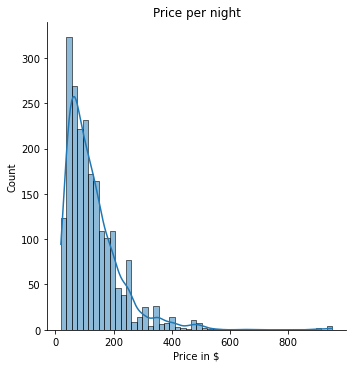

In [26]:
#Price
sns.displot(listings, x='price', bins=50, kde = True)
plt.title('Price per night')
plt.xlabel('Price in $')

From this visualization, we get a lot of information. We can see that price is heavily skewed right. Based on the price distribution we have outliers. It tells us that some hosts listed above the reasonable price per night compare to other hosts.

In [27]:
x = listings.price[listings.price <=500]

trace1 = go.Histogram(
    x=x,
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5)),
    name='Price',
    opacity=0.6
)

data = [trace1]
layout = go.Layout(
    title = "Price less than 500",
    xaxis=dict(
        title='Price in $'),
    yaxis=dict(
        title='Count'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Price less than 500')

Based on the plot, most listings occur at the range between 50 up to 200 dollars per nigh

<AxesSubplot:>

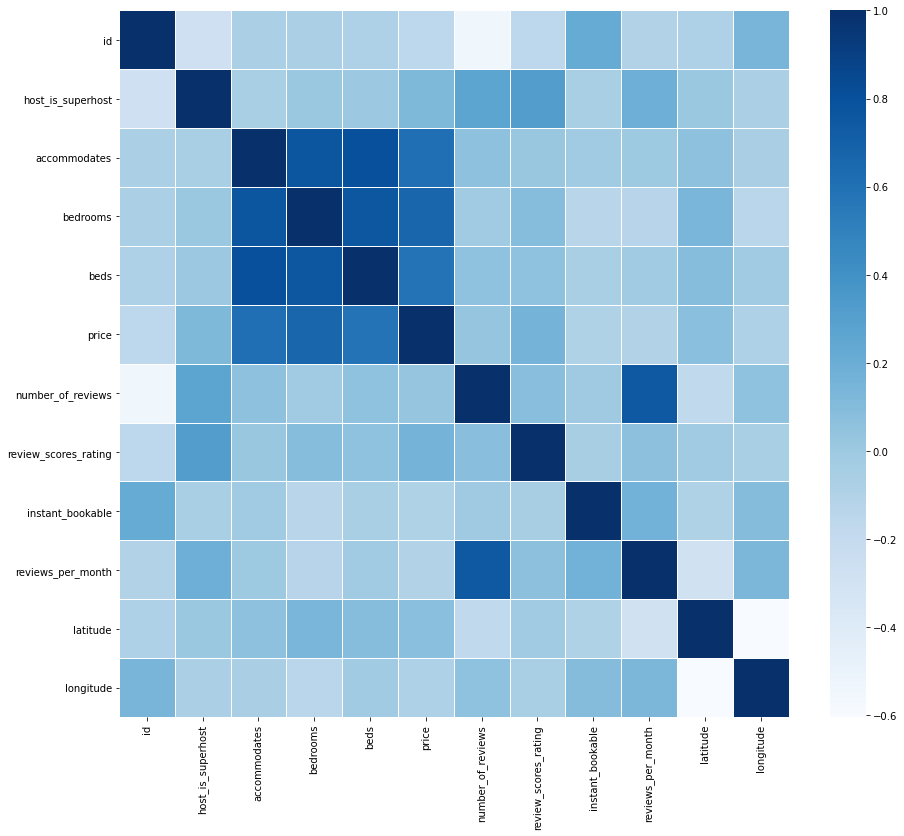

In [28]:
f, ax = plt.subplots(figsize =(15, 13)) 
sns.heatmap(listings.corr(), ax = ax, cmap ='Blues', linewidths = 0.5)

In [29]:
#Analyzing Categorical Variables
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
temp = listings.host_is_superhost.value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"How many hosts are superhosts or not?",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "superhost",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [30]:
#Analyzing Categorical Variables
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
temp = listings.instant_bookable.value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Is it instantly bookable?",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "instantly bookable",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [31]:
#Analyzing Categorical Variables
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
temp = listings.room_type.value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Room Type",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "room type",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [32]:
#Analyzing Categorical Variables
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
temp = listings.property_type.value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Property Type",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "property type",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [33]:
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
temp = listings.neighbourhood.value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Neighbourhood",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "neighbourhood",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [34]:
#Price in neighbourhood
neighbour = listings.groupby('neighbourhood')
neighbour = neighbour['price'].describe().drop(['std', '25%', '50%', '75%'], axis=1).sort_values(by='max', ascending=True)
neighbour

,count,mean,min,max
neighbourhood,,,,
Agassiz,65.0,106.630769,55.0,159.0
Strawberry Hill,81.0,106.000000,60.0,265.0
Neighborhood Nine,141.0,147.539007,44.0,290.0
Area 2/MIT,39.0,152.692308,67.0,302.0
Wellington-Harrington,213.0,76.849765,19.0,310.0
Riverside,113.0,140.026549,31.0,364.0
North Cambridge,226.0,133.650442,33.0,400.0
West Cambridge,155.0,145.716129,25.0,425.0
Cambridgeport,327.0,119.220183,35.0,469.0


In [35]:
n_count = listings.groupby('neighbourhood').count()['id']
n_count = n_count.sort_values(ascending=False)
x = n_count.index
y = n_count
y_cum = np.cumsum(y)
y_perc = 100*y_cum/y.sum()

trace1 = dict(type='bar',
    x=x,
    y=y,
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5)),
    name='Count of Listings',
    opacity=0.6
)

trace2 = dict(type='scatter',
    x=x,
    y=y_perc,
    marker=dict(
        color='#7F7F7F'
    ),
    line=dict(color= '#7F7F7F', width= 1.5),
    name='Cumulative Listings Percent of Total (%)',
    xaxis='x1', 
    yaxis='y2' 
)
    
data = [trace1, trace2]
layout = go.Layout(
    title='Number of Listings by neighbourhood',
    legend= dict(x=-.1, y=1.2),
    yaxis=dict(
        title='Count of Listings'
    ),
    yaxis2=dict(
        title='Percent of Total Listings (%)',
        range=[0,100],
        overlaying='y',
        anchor='x',
        side='right'
        )
    )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Percent of listings by neighbourhood')

Text(0.5, 0.98, 'Room price according to room type')

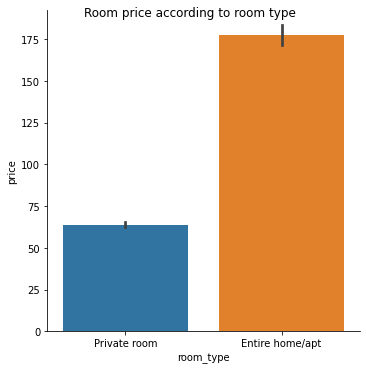

In [36]:
room=sns.catplot(x='room_type', y='price', kind ='bar', data= listings)
room.fig.suptitle("Room price according to room type")

In [37]:
#Create a list of Cambridge Neighborhood names (https://www.cambridgema.gov)
neighborhood_list = {'East Cambridge':1,
       'Area 2/MIT':2,
       'Wellington-Harrington':3,
       'The Port':4,
       'Cambridgeport':5,
       'Mid-Cambridge':6,
       'Riverside':7,
       'Agassiz':8,
       'Neighborhood Nine':9,
       'West Cambridge':10,
       'North Cambridge':11,
       'Cambridge Highlands':12,
       'Strawberry Hill':13}

In [38]:
listings['neighborhood_list']=listings.neighbourhood.map(neighborhood_list)
listings

,id,host_name,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month,latitude,longitude,neighborhood_list
33,1193862,Adam,0,The Port,Bed and breakfast,Private room,2,1,1,"{TV,Internet,Wifi,Kitchen,Heating,Washer,Dryer...",23,125,84.0,0,1.49,42.36494,-71.10054,4
34,1193875,Adam,0,The Port,Bed and breakfast,Private room,2,1,1,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",33,164,90.0,0,1.98,42.36433,-71.09911,4
38,1225831,Paul,1,The Port,Apartment,Entire home/apt,3,1,2,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",155,429,97.0,0,5.12,42.36458,-71.09845,4
40,1307195,Kyle,1,Cambridgeport,Apartment,Entire home/apt,6,3,3,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",469,420,96.0,1,6.11,42.36392,-71.10191,5
61,1984737,Steve,1,West Cambridge,House,Entire home/apt,10,4,5,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",425,293,95.0,1,4.07,42.38116,-71.13326,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,47538101,Olan,0,The Port,Entire apartment,Entire home/apt,4,1,2,"[""Iron"", ""Hangers"", ""Essentials"", ""Wifi"", ""Hot...",85,5,100.0,1,2.05,42.37122,-71.09942,4
777,47703691,Kibbee,0,Wellington-Harrington,Entire apartment,Entire home/apt,2,1,1,"[""Carbon monoxide alarm"", ""Kitchen"", ""Heating""...",85,3,93.0,0,3.00,42.37229,-71.09891,3
784,48107460,John,0,Wellington-Harrington,Private room in apartment,Private room,4,1,2,"[""Iron"", ""Hangers"", ""Essentials"", ""Wifi"", ""Smo...",46,2,100.0,1,2.00,42.36992,-71.09612,3
785,48108594,Roxy,0,Mid-Cambridge,Private room in apartment,Private room,4,1,2,"[""Iron"", ""Hangers"", ""Essentials"", ""Wifi"", ""Smo...",47,1,20.0,1,0.77,42.37185,-71.10017,6


In [39]:
#Mean price and std by neighorhood list
df =listings.groupby(['neighborhood_list'])
agg = pd.core.groupby.GroupBy.aggregate
mean_price = df['price'].agg(np.mean)
std_price = df['price'].agg(np.std)
count_host = df['id'].agg('count')

In [40]:
df = pd.DataFrame({'neighborhood_list': std_price.index,
                   'count_hosts_in_area': count_host.values,
                   'mean_price': mean_price.values,
                   'std_price': std_price.values})
df

,neighborhood_list,count_hosts_in_area,mean_price,std_price
0,1,185,146.637838,105.684486
1,2,39,152.692308,60.719438
2,3,213,76.849765,57.327559
3,4,272,103.750000,83.238931
4,5,327,119.220183,84.838463
5,6,302,157.228477,136.604520
6,7,113,140.026549,101.243823
7,8,65,106.630769,29.293008
8,9,141,147.539007,65.510906
9,10,155,145.716129,94.730291


In [43]:
#Mapping
mapping = gpd.read_file('ASSESSING_ResidentialDistrictsFY2021.geojson')
mapping

,GlobalID,DISTRICT,geometry
0,{B6FC8AE0-1A80-4403-9DA8-975B9DDC9FC0},3,"POLYGON ((-71.10879 42.37735, -71.10862 42.377..."
1,{5470FA1B-16D8-4123-B2B8-BDD0D4A21361},7,"POLYGON ((-71.15527 42.38085, -71.15531 42.380..."
2,{CD137A79-CD06-4D22-B821-D26ECE35F021},13,"POLYGON ((-71.10685 42.36432, -71.10672 42.364..."
3,{97F10F36-94FE-4B2E-A5B6-B3F4B5D2147F},6,"POLYGON ((-71.12175 42.38823, -71.12134 42.388..."
4,{D3BE70E2-23B2-4650-8DEA-9A02D260CB4D},15,"POLYGON ((-71.15953 42.38591, -71.15947 42.385..."
5,{886EDEF2-0B04-4AA3-8DAE-10FEB854A6F5},14,"POLYGON ((-71.13518 42.38037, -71.13519 42.380..."
6,{36BE3E51-0560-4994-A5FF-9622B006B2A7},8,"POLYGON ((-71.12610 42.38400, -71.12597 42.384..."
7,{22D8C907-6B3A-4A98-A4BB-1A27F489DA17},9,"POLYGON ((-71.15730 42.38229, -71.15731 42.382..."
8,{F02D34A4-6444-42C9-8BE7-0AC31835F3FA},17,"POLYGON ((-71.12017 42.39259, -71.11963 42.391..."
9,{57DB4A19-A61B-44B6-BB15-818411A4FC66},16,"POLYGON ((-71.11984 42.37689, -71.12007 42.377..."


In [44]:
mapping = mapping[['DISTRICT','geometry']].sort_values(by='DISTRICT').reset_index(drop=True)
mapp = mapping.copy().to_crs({'init':'epsg:3857'})
mapp.crs
mapping['centroid'] = mapping['geometry'].centroid
mapping['area'] = mapp['geometry'].area/10**6
mapping

C:\Users\elena\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6

<ipython-input-44-d9fdfba5d788>:4: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




,DISTRICT,geometry,centroid,area
0,1,"POLYGON ((-71.07057 42.37236, -71.07038 42.372...",POINT (-71.08386 42.36567),6.578558
1,2,"POLYGON ((-71.09723 42.37443, -71.09693 42.374...",POINT (-71.09831 42.36899),1.193931
2,3,"POLYGON ((-71.10879 42.37735, -71.10862 42.377...",POINT (-71.10575 42.37159),1.380587
3,4,"POLYGON ((-71.11566 42.37631, -71.11565 42.376...",POINT (-71.11369 42.37319),1.054102
4,5,"POLYGON ((-71.11204 42.38155, -71.11166 42.381...",POINT (-71.11268 42.37907),0.509337
5,6,"POLYGON ((-71.12175 42.38823, -71.12134 42.388...",POINT (-71.12327 42.38268),1.326544
6,7,"POLYGON ((-71.12601 42.39221, -71.12602 42.392...",POINT (-71.14021 42.39395),5.918043
7,7,"POLYGON ((-71.15527 42.38085, -71.15531 42.380...",POINT (-71.15093 42.37736),0.768694
8,8,"POLYGON ((-71.12610 42.38400, -71.12597 42.384...",POINT (-71.13316 42.38446),0.976455
9,9,"POLYGON ((-71.15730 42.38229, -71.15731 42.382...",POINT (-71.14674 42.38065),3.765263


<ipython-input-45-8e65977f0e07>:2: DeprecationWarning:

plot_polygon_collection is intended for internal use only, and will be deprecated.



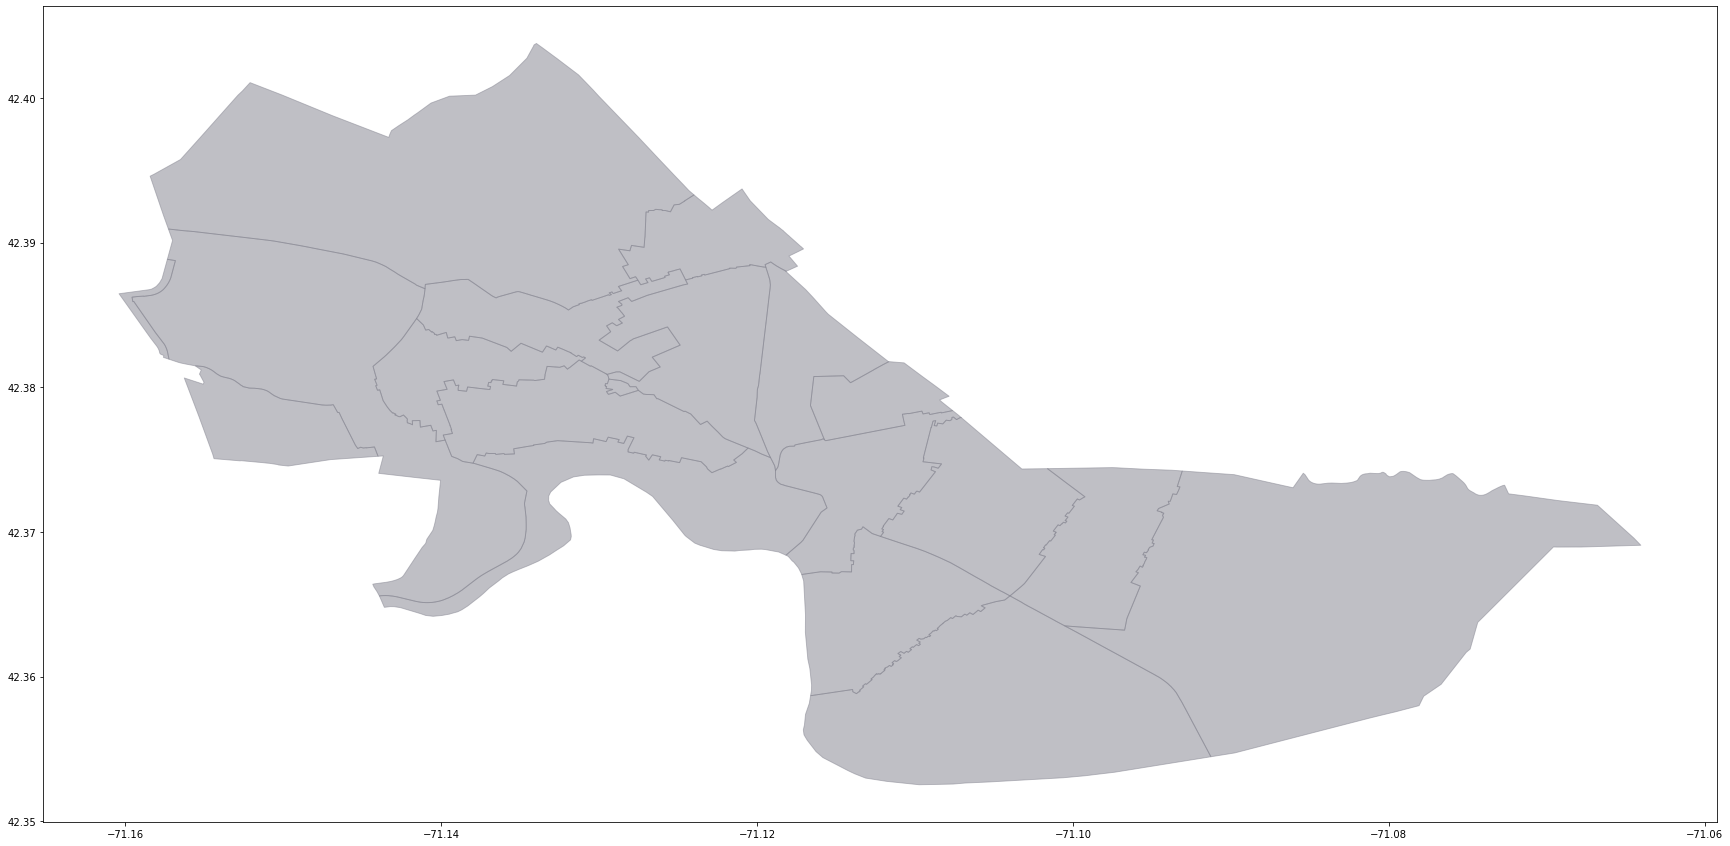

In [45]:
f, ax = plt.subplots(figsize=(30,15))
gpd.plotting.plot_polygon_collection(ax,
                                    mapping['geometry'],
                                    linewidth = 0.9,
                                    color = '#81818D',
                                    alpha = 0.5)

In [46]:
geomap = [Point(xy) for xy in zip(listings.longitude, listings.latitude)]
crs = mapping.crs
geo_mapping = gpd.GeoDataFrame(listings, crs = crs, geometry = geomap)
geo_mapping.head()

,id,host_name,host_is_superhost,neighbourhood,property_type,room_type,accommodates,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month,latitude,longitude,neighborhood_list,geometry
33,1193862,Adam,0,The Port,Bed and breakfast,Private room,2,1,1,"{TV,Internet,Wifi,Kitchen,Heating,Washer,Dryer...",23,125,84.0,0,1.49,42.36494,-71.10054,4,POINT (-71.10054 42.36494)
34,1193875,Adam,0,The Port,Bed and breakfast,Private room,2,1,1,"{Internet,Wifi,Kitchen,Heating,Washer,Dryer,""S...",33,164,90.0,0,1.98,42.36433,-71.09911,4,POINT (-71.09911 42.36433)
38,1225831,Paul,1,The Port,Apartment,Entire home/apt,3,1,2,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",155,429,97.0,0,5.12,42.36458,-71.09845,4,POINT (-71.09845 42.36458)
40,1307195,Kyle,1,Cambridgeport,Apartment,Entire home/apt,6,3,3,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",469,420,96.0,1,6.11,42.36392,-71.10191,5,POINT (-71.10191 42.36392)
61,1984737,Steve,1,West Cambridge,House,Entire home/apt,10,4,5,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",425,293,95.0,1,4.07,42.38116,-71.13326,10,POINT (-71.13326 42.38116)


In [47]:
geo_map = gpd.GeoDataFrame(df, crs = crs, geometry = mapping['geometry'])
geo_map = pd.concat([geo_map, mapping[['centroid', 'area']]], axis=1)
geo_map['density'] = (geo_map['count_hosts_in_area'])/(geo_map['area'])
geo_map = geo_map.dropna()
geo_map['neighborhood_list'] =  geo_map['neighborhood_list'].apply(np.int64)
geo_map

,neighborhood_list,count_hosts_in_area,mean_price,std_price,geometry,centroid,area,density
0,1,185.0,146.637838,105.684486,"POLYGON ((-71.07057 42.37236, -71.07038 42.372...",POINT (-71.08386 42.36567),6.578558,28.121663
1,2,39.0,152.692308,60.719438,"POLYGON ((-71.09723 42.37443, -71.09693 42.374...",POINT (-71.09831 42.36899),1.193931,32.665196
2,3,213.0,76.849765,57.327559,"POLYGON ((-71.10879 42.37735, -71.10862 42.377...",POINT (-71.10575 42.37159),1.380587,154.282159
3,4,272.0,103.750000,83.238931,"POLYGON ((-71.11566 42.37631, -71.11565 42.376...",POINT (-71.11369 42.37319),1.054102,258.039630
4,5,327.0,119.220183,84.838463,"POLYGON ((-71.11204 42.38155, -71.11166 42.381...",POINT (-71.11268 42.37907),0.509337,642.011536
5,6,302.0,157.228477,136.604520,"POLYGON ((-71.12175 42.38823, -71.12134 42.388...",POINT (-71.12327 42.38268),1.326544,227.659264
6,7,113.0,140.026549,101.243823,"POLYGON ((-71.12601 42.39221, -71.12602 42.392...",POINT (-71.14021 42.39395),5.918043,19.094150
7,8,65.0,106.630769,29.293008,"POLYGON ((-71.15527 42.38085, -71.15531 42.380...",POINT (-71.15093 42.37736),0.768694,84.558983
8,9,141.0,147.539007,65.510906,"POLYGON ((-71.12610 42.38400, -71.12597 42.384...",POINT (-71.13316 42.38446),0.976455,144.399862
9,10,155.0,145.716129,94.730291,"POLYGON ((-71.15730 42.38229, -71.15731 42.382...",POINT (-71.14674 42.38065),3.765263,41.165781


(-71.16435409379984, -71.05927084412781, 42.35199049321885, 42.40622562948223)

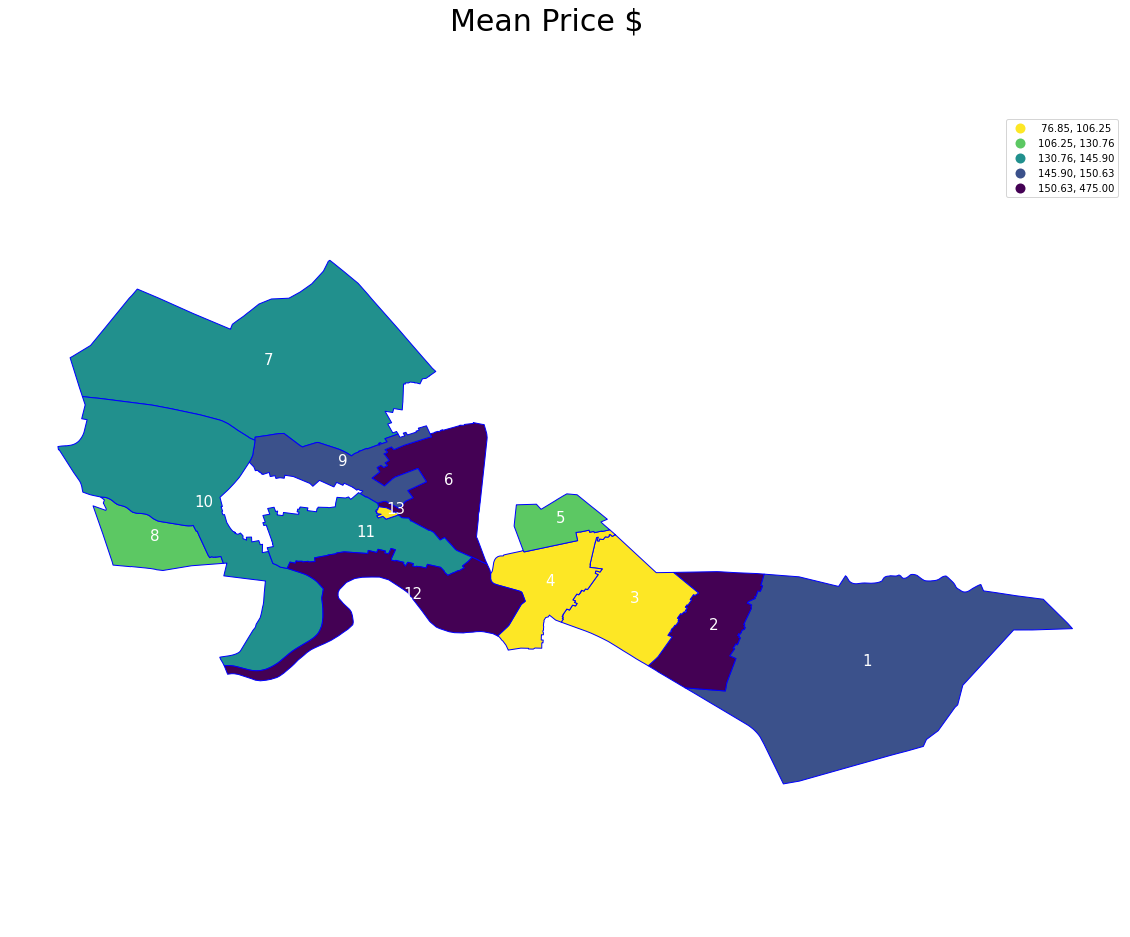

In [48]:
#What is the mean price for each neighborhood?
f, ax = plt.subplots(figsize = (20, 15))
geo_map.plot(column = 'mean_price', ax=ax, scheme='Quantiles',
            cmap='viridis_r', legend = True, linewidth = 1, edgecolor = 'blue')
for i in geo_map.iterrows():
    ax.text(i[1]['centroid'].x,
            i[1]['centroid'].y,
            i[1]['neighborhood_list'],
            fontsize=15, color = 'white')
ax.set_axis_off()
f.suptitle('Mean Price $', fontsize=30)
plt.axis('equal')

In [49]:
import plotly
import plotly.express as px
fig = px.scatter_mapbox(listings, lat='latitude', lon='longitude', 
                        color='price', size='price', opacity=.6,
                        hover_name='neighbourhood',hover_data=['neighborhood_list'],
                        color_discrete_sequence=plotly.colors.qualitative.Prism_r, 
                        zoom=12, labels={'price':'Cambridge Price'}
                       )
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

# Data Modeling

In [50]:
#dropping features not needed for further analysis
listings = listings.drop(['host_name', 'geometry', 'latitude', 'longitude', 'neighborhood_list', 'amenities', 'room_type'], axis=1)
listings.head()

,id,host_is_superhost,neighbourhood,property_type,accommodates,bedrooms,beds,price,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month
33,1193862,0,The Port,Bed and breakfast,2,1,1,23,125,84.0,0,1.49
34,1193875,0,The Port,Bed and breakfast,2,1,1,33,164,90.0,0,1.98
38,1225831,1,The Port,Apartment,3,1,2,155,429,97.0,0,5.12
40,1307195,1,Cambridgeport,Apartment,6,3,3,469,420,96.0,1,6.11
61,1984737,1,West Cambridge,House,10,4,5,425,293,95.0,1,4.07


<ipython-input-51-17c8a77c88da>:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

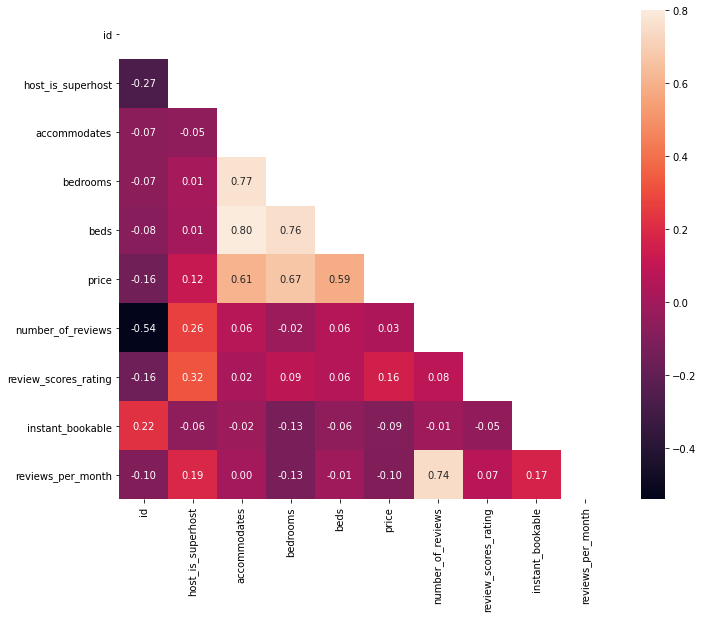

In [51]:
#Correlation heatmap
corr = listings.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.rcParams['figure.figsize'] = [11, 9]
sns.heatmap(corr, mask=mask, annot = True, fmt='.2f')

In [52]:
obj_df = listings.select_dtypes(include=['object']).copy()
obj_df

,neighbourhood,property_type
33,The Port,Bed and breakfast
34,The Port,Bed and breakfast
38,The Port,Apartment
40,Cambridgeport,Apartment
61,West Cambridge,House
...,...,...
775,The Port,Entire apartment
777,Wellington-Harrington,Entire apartment
784,Wellington-Harrington,Private room in apartment
785,Mid-Cambridge,Private room in apartment


In [53]:
for i in obj_df['neighbourhood'].unique():
    print (i)

The Port
Cambridgeport
West Cambridge
North Cambridge
Agassiz
Mid-Cambridge
Wellington-Harrington
East Cambridge
Neighborhood Nine
Strawberry Hill
Riverside
Area 2/MIT
Cambridge Highlands


In [54]:
for i in obj_df['property_type'].unique():
    print (i)

Bed and breakfast
Apartment
House
Condominium
Guest suite
Serviced apartment
Townhouse
Entire apartment
Private room in apartment
Private room in bed and breakfast
Entire house
Entire guest suite
Entire condominium
Private room in house
Private room in townhouse
Entire loft
Entire townhouse
Entire serviced apartment
Private room in guest suite
Room in boutique hotel
Private room in condominium
Barn


In [55]:
obj_df = pd.get_dummies(obj_df)
obj_df = obj_df.loc[~obj_df.index.duplicated(keep='first')]
obj_df

,neighbourhood_Agassiz,neighbourhood_Area 2/MIT,neighbourhood_Cambridge Highlands,neighbourhood_Cambridgeport,neighbourhood_East Cambridge,neighbourhood_Mid-Cambridge,neighbourhood_Neighborhood Nine,neighbourhood_North Cambridge,neighbourhood_Riverside,neighbourhood_Strawberry Hill,...,property_type_House,property_type_Private room in apartment,property_type_Private room in bed and breakfast,property_type_Private room in condominium,property_type_Private room in guest suite,property_type_Private room in house,property_type_Private room in townhouse,property_type_Room in boutique hotel,property_type_Serviced apartment,property_type_Townhouse
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
755,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
772,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
num_df = listings.select_dtypes(include=['int32', 'int64','float'])
num_df = num_df.loc[~num_df.index.duplicated(keep='first')]
num_df

,id,host_is_superhost,accommodates,bedrooms,beds,price,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month
33,1193862,0,2,1,1,23,125,84.0,0,1.49
34,1193875,0,2,1,1,33,164,90.0,0,1.98
38,1225831,1,3,1,2,155,429,97.0,0,5.12
40,1307195,1,6,3,3,469,420,96.0,1,6.11
61,1984737,1,10,4,5,425,293,95.0,1,4.07
...,...,...,...,...,...,...,...,...,...,...
640,43554389,1,2,2,2,85,1,100.0,0,0.14
718,46345380,0,5,3,3,116,3,87.0,0,0.85
755,46816009,0,1,1,1,42,1,100.0,1,0.64
772,47223523,1,2,1,2,295,2,90.0,0,1.36


In [57]:
df = pd.concat([num_df, obj_df], axis=1, join='inner')
df.head()

,id,host_is_superhost,accommodates,bedrooms,beds,price,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month,...,property_type_House,property_type_Private room in apartment,property_type_Private room in bed and breakfast,property_type_Private room in condominium,property_type_Private room in guest suite,property_type_Private room in house,property_type_Private room in townhouse,property_type_Room in boutique hotel,property_type_Serviced apartment,property_type_Townhouse
33,1193862,0,2,1,1,23,125,84.0,0,1.49,...,0,0,0,0,0,0,0,0,0,0
34,1193875,0,2,1,1,33,164,90.0,0,1.98,...,0,0,0,0,0,0,0,0,0,0
38,1225831,1,3,1,2,155,429,97.0,0,5.12,...,0,0,0,0,0,0,0,0,0,0
40,1307195,1,6,3,3,469,420,96.0,1,6.11,...,0,0,0,0,0,0,0,0,0,0
61,1984737,1,10,4,5,425,293,95.0,1,4.07,...,1,0,0,0,0,0,0,0,0,0


In [58]:
print(df.shape)
list(df.columns)

(797, 45)


['id',
 'host_is_superhost',
 'accommodates',
 'bedrooms',
 'beds',
 'price',
 'number_of_reviews',
 'review_scores_rating',
 'instant_bookable',
 'reviews_per_month',
 'neighbourhood_Agassiz',
 'neighbourhood_Area 2/MIT',
 'neighbourhood_Cambridge Highlands',
 'neighbourhood_Cambridgeport',
 'neighbourhood_East Cambridge',
 'neighbourhood_Mid-Cambridge',
 'neighbourhood_Neighborhood Nine',
 'neighbourhood_North Cambridge',
 'neighbourhood_Riverside',
 'neighbourhood_Strawberry Hill',
 'neighbourhood_The Port',
 'neighbourhood_Wellington-Harrington',
 'neighbourhood_West Cambridge',
 'property_type_Apartment',
 'property_type_Barn',
 'property_type_Bed and breakfast',
 'property_type_Condominium',
 'property_type_Entire apartment',
 'property_type_Entire condominium',
 'property_type_Entire guest suite',
 'property_type_Entire house',
 'property_type_Entire loft',
 'property_type_Entire serviced apartment',
 'property_type_Entire townhouse',
 'property_type_Guest suite',
 'property_typ

In [59]:
df.corr()['price']

id                                                -0.162544
host_is_superhost                                  0.113485
accommodates                                       0.612817
bedrooms                                           0.642928
beds                                               0.575924
price                                              1.000000
number_of_reviews                                  0.126387
review_scores_rating                               0.117285
instant_bookable                                  -0.074798
reviews_per_month                                 -0.018766
neighbourhood_Agassiz                             -0.042013
neighbourhood_Area 2/MIT                           0.047944
neighbourhood_Cambridge Highlands                  0.129355
neighbourhood_Cambridgeport                        0.029261
neighbourhood_East Cambridge                       0.100095
neighbourhood_Mid-Cambridge                        0.122792
neighbourhood_Neighborhood Nine         

In [60]:
df = df.drop(['property_type_Barn', 'property_type_Private room in condominium'], axis=1)

In [61]:
df.corr()['price']

id                                                -0.162544
host_is_superhost                                  0.113485
accommodates                                       0.612817
bedrooms                                           0.642928
beds                                               0.575924
price                                              1.000000
number_of_reviews                                  0.126387
review_scores_rating                               0.117285
instant_bookable                                  -0.074798
reviews_per_month                                 -0.018766
neighbourhood_Agassiz                             -0.042013
neighbourhood_Area 2/MIT                           0.047944
neighbourhood_Cambridge Highlands                  0.129355
neighbourhood_Cambridgeport                        0.029261
neighbourhood_East Cambridge                       0.100095
neighbourhood_Mid-Cambridge                        0.122792
neighbourhood_Neighborhood Nine         

In [62]:
X = df.drop(['id', 'price'],axis=1)
y = df['price']

In [63]:
#predicting and obtaining a summary of the Ordinary least squares method
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     31.17
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          1.40e-130
Time:                        12:37:44   Log-Likelihood:                -4376.1
No. Observations:                 797   AIC:                             8832.
Df Residuals:                     757   BIC:                             9019.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
host_is_superhost                                   8.9738      5.179      1.733      0.084      -1.193      19.140
accommodates                                        8.5199      2.203      3.867      0.000       4.195      12.845
bedrooms                                           42.7223      5.282      8.089      0.000      32.354      53.091
beds                                                4.6789      3.768      1.242      0.215      -2.718      12.076
number_of_reviews                                   0.1441      0.035      4.142      0.000       0.076       0.212
review_scores_rating                                0.2925      0.296      0.989      0.323      -0.288       0.873
instant_bookable                                   -3.2387      4.870     -0.665      0.506     -12.800       6.323
reviews_per_month                                  -3.5630      1.691     -2.107      0.035      -6.883      -0.243
neighbourhood_Agassiz                             -10.1970     21.624     -0.472      0.637     -52.647      32.254
neighbourhood_Area 2/MIT                          141.6678     29.342      4.828      0.000      84.067     199.269
neighbourhood_Cambridge Highlands                 192.9423     63.271      3.049      0.002      68.735     317.150
neighbourhood_Cambridgeport                        -1.9972     18.832     -0.106      0.916     -38.966      34.971
neighbourhood_East Cambridge                       32.1965     19.104      1.685      0.092      -5.307      69.700
neighbourhood_Mid-Cambridge                        24.8005     18.661      1.329      0.184     -11.833      61.434
neighbourhood_Neighborhood Nine                     0.6689     19.159      0.035      0.972     -36.943      38.281
neighbourhood_North Cambridge                     -13.3071     18.529     -0.718      0.473     -49.682      23.067
neighbourhood_Riverside                            -7.1904     20.390     -0.353      0.724     -47.219      32.838
neighbourhood_Strawberry Hill                     -11.7772     20.749     -0.568      0.570     -52.509      28.954
neighbourhood_The Port                            -18.4973     18.016     -1.027      0.305     -53.864      16.869
neighbourhood_Wellington-Harrington               -25.2660     18.505     -1.365      0.173     -61.593      11.061
neighbourhood_West Cambridge                      -27.6669     19.137     -1.446      0.149     -65.235       9.901
property_type_Apartment                             7.6058     12.807      0.594      0.553     -17.537      32.748
property_type_Bed and breakfast                   -39.8329     23.509     -1.694      0.091     -85.984       6.318
property_type_Condominium                          17.1822     16.6

In [64]:
X2 = df.drop(['price', 'id','property_type_Apartment', 'property_type_House', 'property_type_Condominium', 'property_type_Guest suite', 'property_type_Serviced apartment', 'property_type_Private room in bed and breakfast', 'property_type_Townhouse'],axis=1)
y2 = df['price']

In [65]:
model2 = sm.OLS(y2, X2).fit()
predictions = model2.predict(X2) 
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     33.64
Date:                Tue, 13 Jul 2021   Prob (F-statistic):          1.32e-125
Time:                        12:37:44   Log-Likelihood:                -4399.8
No. Observations:                 797   AIC:                             8868.
Df Residuals:                     763   BIC:                             9027.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
host_is_superhost                            10.0459      5.277      1.904      0.057      -0.314      20.406
accommodates                                  9.7161      2.237      4.343      0.000       5.324      14.108
bedrooms                                     44.4162      5.326      8.339      0.000      33.961      54.872
beds                                          3.8598      3.859      1.000      0.317      -3.715      11.435
number_of_reviews                             0.1391      0.035      3.982      0.000       0.071       0.208
review_scores_rating                          0.2558      0.301      0.849      0.396      -0.336       0.847
instant_bookable                             -4.2463      4.895     -0.868      0.386     -13.855       5.362
reviews_per_month                            -3.1306      1.708     -1.832      0.067      -6.484       0.223
neighbourhood_Agassiz                        -2.2408     31.695     -0.071      0.944     -64.460      59.978
neighbourhood_Area 2/MIT                    153.7796     38.354      4.009      0.000      78.488     229.072
neighbourhood_Cambridge Highlands           201.4209     70.607      2.853      0.004      62.814     340.028
neighbourhood_Cambridgeport                   6.8214     29.570      0.231      0.818     -51.227      64.870
neighbourhood_East Cambridge                 43.5371     29.793      1.461      0.144     -14.950     102.024
neighbourhood_Mid-Cambridge                  30.7886     29.493      1.044      0.297     -27.108      88.685
neighbourhood_Neighborhood Nine               5.7382     29.663      0.193      0.847     -52.492      63.968
neighbourhood_North Cambridge                -4.9690     29.090     -0.171      0.864     -62.075      52.137
neighbourhood_Riverside                       0.2116     30.802      0.007      0.995     -60.255      60.678
neighbourhood_Strawberry Hill                -3.5571     30.827     -0.115      0.908     -64.073      56.959
neighbourhood_The Port                      -12.4673     28.588     -0.436      0.663     -68.587      43.652
neighbourhood_Wellington-Harrington         -17.1004     29.012     -0.589      0.556     -74.053      39.852
neighbourhood_West Cambridge                -18.0891     29.605     -0.611      0.541     -76.205      40.027
property_type_Bed and breakfast             -46.0187     22.796     -2.019      0.044     -90.769      -1.268
property_type_Entire apartment               -2.7836      6.246     -0.446      0.656     -15.044       9.477
property_type_Entire condominium             -9.7851     11.516     -0.850      0.396     -32.391      12.821
property_type_Entire guest suite             29.9991     14.085      2.130      0.034       2.349      57.649
pro

In [66]:
np.abs(model.params).sort_values(ascending=False)

property_type_Townhouse                            250.891212
neighbourhood_Cambridge Highlands                  192.942335
property_type_Entire townhouse                     179.525582
neighbourhood_Area 2/MIT                           141.667801
property_type_Entire serviced apartment            130.277606
property_type_Serviced apartment                   111.086378
property_type_Room in boutique hotel                87.613062
property_type_Guest suite                           61.124842
property_type_Private room in townhouse             48.746538
property_type_Private room in bed and breakfast     44.011209
bedrooms                                            42.722320
property_type_Entire guest suite                    41.102053
property_type_Bed and breakfast                     39.832854
property_type_Private room in guest suite           33.024404
neighbourhood_East Cambridge                        32.196461
property_type_Private room in apartment             29.055296
neighbou

In [67]:
#most influential coefficients in the model
np.abs(model2.params).sort_values(ascending=False)

neighbourhood_Cambridge Highlands            201.420913
property_type_Entire townhouse               163.877838
neighbourhood_Area 2/MIT                     153.779579
property_type_Entire serviced apartment      145.705701
property_type_Room in boutique hotel          99.296285
property_type_Private room in townhouse       58.658423
property_type_Bed and breakfast               46.018657
bedrooms                                      44.416158
neighbourhood_East Cambridge                  43.537077
property_type_Private room in guest suite     40.659360
property_type_Private room in apartment       37.030502
neighbourhood_Mid-Cambridge                   30.788616
property_type_Private room in house           30.646333
property_type_Entire guest suite              29.999066
neighbourhood_West Cambridge                  18.089138
neighbourhood_Wellington-Harrington           17.100420
neighbourhood_The Port                        12.467327
host_is_superhost                             10

In [68]:
np.abs(model.params).describe()

count     41.000000
mean      42.138861
std       58.563810
min        0.144074
25%        7.605817
50%       18.497331
75%       42.722320
max      250.891212
dtype: float64

In [69]:
np.abs(model2.params).describe()

count     34.000000
mean      36.611686
std       53.109106
min        0.139061
25%        3.632772
50%       11.256629
75%       42.817648
max      201.420913
dtype: float64

In [70]:
coeffs = model.params[np.abs(model.params) >= 10]
print(coeffs.sort_values(ascending=False))

property_type_Townhouse                            250.891212
neighbourhood_Cambridge Highlands                  192.942335
property_type_Entire townhouse                     179.525582
neighbourhood_Area 2/MIT                           141.667801
property_type_Serviced apartment                   111.086378
property_type_Guest suite                           61.124842
bedrooms                                            42.722320
property_type_Entire guest suite                    41.102053
neighbourhood_East Cambridge                        32.196461
neighbourhood_Mid-Cambridge                         24.800528
property_type_Condominium                           17.182167
property_type_House                                 15.486393
property_type_Entire house                          12.143081
neighbourhood_Agassiz                              -10.196969
neighbourhood_Strawberry Hill                      -11.777169
neighbourhood_North Cambridge                      -13.307050
neighbou

In [71]:
coeffs2 = model2.params[np.abs(model2.params) >= 5]
print(coeffs2.sort_values(ascending=False))

neighbourhood_Cambridge Highlands            201.420913
property_type_Entire townhouse               163.877838
neighbourhood_Area 2/MIT                     153.779579
bedrooms                                      44.416158
neighbourhood_East Cambridge                  43.537077
neighbourhood_Mid-Cambridge                   30.788616
property_type_Entire guest suite              29.999066
host_is_superhost                             10.045932
accommodates                                   9.716103
neighbourhood_Cambridgeport                    6.821450
neighbourhood_Neighborhood Nine                5.738232
property_type_Entire condominium              -9.785066
neighbourhood_The Port                       -12.467327
neighbourhood_Wellington-Harrington          -17.100420
neighbourhood_West Cambridge                 -18.089138
property_type_Private room in house          -30.646333
property_type_Private room in apartment      -37.030502
property_type_Private room in guest suite    -40

In [72]:
features_coeffs = coeffs.sort_values(ascending=True)

trace1 = go.Bar(
    y=features_coeffs.index,
    x=features_coeffs,
    name='Most Influential Features',
    orientation = 'h',
    marker = dict(
        color = 'rgb(158,202,225)',
        line = dict(
            color = 'rgb(8,48,107)',
            width = 1.5),
        opacity=0.6
    ))

data = [trace1]
 
layout = go.Layout(
    title = "Most Influential Features",
    xaxis=dict(
        title='Coefficients',
        autorange=True),
    yaxis=dict(automargin=True,
               autorange=True))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Most Influential Features')

In [73]:
features_coeffs = coeffs2.sort_values(ascending=True)

trace1 = go.Bar(
    y=features_coeffs.index,
    x=features_coeffs,
    name='Most Influential Features',
    orientation = 'h',
    marker = dict(
        color = 'rgb(158,202,225)',
        line = dict(
            color = 'rgb(8,48,107)',
            width = 1.5),
        opacity=0.6
    ))

data = [trace1]
 
layout = go.Layout(
    title = "Most Influential Features",
    xaxis=dict(
        title='Coefficients',
        autorange=True),
    yaxis=dict(automargin=True,
               autorange=True))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Most Influential Features')

In [74]:
import statsmodels.api as sm
X_train = X2
X_train = X_train.to_numpy()
X_train

array([[0., 2., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [1., 3., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 2., 1., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.]])

In [75]:
mean_features = X_train.mean(axis=0)
print("\nMean: ", mean_features)


Mean:  [4.55457967e-01 3.36386449e+00 1.40903388e+00 1.78419072e+00
 9.04040151e+01 9.45683814e+01 4.29109159e-01 2.64859473e+00
 3.13676286e-02 1.25470514e-02 1.25470514e-03 1.44291092e-01
 7.90464241e-02 1.43036386e-01 7.65370138e-02 1.21706399e-01
 4.64240903e-02 3.63864492e-02 1.48055207e-01 9.03387704e-02
 6.90087829e-02 1.00376412e-02 2.45922208e-01 4.76787955e-02
 2.88582183e-02 2.50941029e-02 5.01882058e-03 1.12923463e-02
 8.78293601e-03 1.51819322e-01 1.12923463e-02 7.52823087e-02
 5.01882058e-03 2.50941029e-03]


In [76]:
std_features = X_train.std(axis=0)
print("\nStd: ", std_features)


Std:  [4.98012055e-01 2.01265734e+00 7.56946050e-01 1.11389130e+00
 9.71224628e+01 8.10714969e+00 4.94948976e-01 2.10670222e+00
 1.74309209e-01 1.11308683e-01 3.53995884e-02 3.51384650e-01
 2.69811206e-01 3.50109952e-01 2.65855411e-01 3.26946405e-01
 2.10401745e-01 1.87249768e-01 3.55154702e-01 2.86666491e-01
 2.53469073e-01 9.96839351e-02 4.30632646e-01 2.13085729e-01
 1.67407949e-01 1.56410962e-01 7.06656353e-02 1.05663755e-01
 9.33048554e-02 3.58845671e-01 1.05663755e-01 2.63846324e-01
 7.06656353e-02 5.00311218e-02]


In [77]:
y_train = y2
y_train = y_train.to_numpy()
y_train

array([ 23,  33, 155, 469, 425, 350,  79, 170, 145, 250, 168, 100, 145,
       120,  99,  35, 115, 120, 100,  79, 110,  99, 145,  50, 199, 224,
       130, 109,  70,  55,  65,  67,  75,  60,  99,  99,  79,  75,  65,
        65,  65,  29,  65, 110,  60,  60,  60,  60,  60,  60,  65,  65,
       500,  65, 150, 114, 150,  75,  99,  99, 125, 149, 107, 170, 210,
       136,  23, 155, 240, 425, 350,  79, 170, 145, 184, 250,  69,  60,
       125, 100, 175, 125, 145, 145, 100, 140,  99, 140,  35, 115, 120,
       200, 100, 150, 265, 110,  40, 119,  99,  99,  99, 145,  89,  99,
        50, 199, 224, 130, 109,  70,  55,  50, 170,  89, 105,  65, 290,
       145,  67,  75, 179,  60, 439,  99,  99,  99,  79,  65,  65,  65,
        29,  65,  65,  65, 110, 110, 110,  60,  60,  60,  60,  99,  60,
        60,  60,  65,  65,  65, 500, 230, 114, 134, 150, 173,  75,  99,
       130, 213,  99,  99,  99,  99,  99, 149,  99,  99, 125, 149, 100,
       162, 170, 210, 199, 130,  62,  38, 136, 150, 150, 155, 46

In [78]:
X_train.shape

(797, 34)

In [79]:
y_train.shape

(797,)

In [80]:
#Scale the input features such that the all have zero mean and unit standard deviation. 
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_train_scaled

array([[-0.91455209, -0.67764366, -0.54037388, ..., -0.28532635,
        -0.07102208, -0.05015699],
       [-0.91455209, -0.67764366, -0.54037388, ..., -0.28532635,
        -0.07102208, -0.05015699],
       [ 1.09343143, -0.1807881 , -0.54037388, ..., -0.28532635,
        -0.07102208, -0.05015699],
       ...,
       [-0.91455209, -1.17449923, -0.54037388, ..., -0.28532635,
        -0.07102208, -0.05015699],
       [ 1.09343143, -0.67764366, -0.54037388, ..., -0.28532635,
        -0.07102208, -0.05015699],
       [-0.91455209, -0.67764366, -0.54037388, ..., -0.28532635,
        -0.07102208, -0.05015699]])

In [81]:
X_train_scaled.mean(axis=0)

array([ 8.24657504e-17, -6.35209158e-17, -6.24065138e-17, -1.78304325e-17,
        0.00000000e+00, -8.22428700e-16,  0.00000000e+00,  3.56608650e-17,
        2.22880406e-18,  3.56608650e-17,  6.68641219e-18, -3.34320610e-17,
       -2.22880406e-18,  2.67456488e-17,  4.01184732e-17, -4.68048854e-17,
        1.33728244e-17,  2.22880406e-17,  0.00000000e+00, -7.57793382e-17,
        1.56016285e-17,  8.91521626e-18, -7.13217301e-17,  7.13217301e-17,
        1.33728244e-17, -4.45760813e-17,  2.45168447e-17,  8.91521626e-18,
        8.91521626e-18, -8.91521626e-17,  2.67456488e-17, -5.34912975e-17,
        2.45168447e-17, -8.91521626e-18])

In [82]:
X_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [83]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [84]:
scaler.mean_

array([4.55457967e-01, 3.36386449e+00, 1.40903388e+00, 1.78419072e+00,
       9.04040151e+01, 9.45683814e+01, 4.29109159e-01, 2.64859473e+00,
       3.13676286e-02, 1.25470514e-02, 1.25470514e-03, 1.44291092e-01,
       7.90464241e-02, 1.43036386e-01, 7.65370138e-02, 1.21706399e-01,
       4.64240903e-02, 3.63864492e-02, 1.48055207e-01, 9.03387704e-02,
       6.90087829e-02, 1.00376412e-02, 2.45922208e-01, 4.76787955e-02,
       2.88582183e-02, 2.50941029e-02, 5.01882058e-03, 1.12923463e-02,
       8.78293601e-03, 1.51819322e-01, 1.12923463e-02, 7.52823087e-02,
       5.01882058e-03, 2.50941029e-03])

In [85]:
scaler.transform(X_train)

array([[-0.91455209, -0.67764366, -0.54037388, ..., -0.28532635,
        -0.07102208, -0.05015699],
       [-0.91455209, -0.67764366, -0.54037388, ..., -0.28532635,
        -0.07102208, -0.05015699],
       [ 1.09343143, -0.1807881 , -0.54037388, ..., -0.28532635,
        -0.07102208, -0.05015699],
       ...,
       [-0.91455209, -1.17449923, -0.54037388, ..., -0.28532635,
        -0.07102208, -0.05015699],
       [ 1.09343143, -0.67764366, -0.54037388, ..., -0.28532635,
        -0.07102208, -0.05015699],
       [-0.91455209, -0.67764366, -0.54037388, ..., -0.28532635,
        -0.07102208, -0.05015699]])

In [86]:
print('X_train_scaled=\n', X_train_scaled)
print('mean(X_train_scaled)=', X_train_scaled.mean(axis=0))
print('std(X_train_scaled)=', X_train_scaled.std(axis=0))

X_train_scaled=
 [[-0.91455209 -0.67764366 -0.54037388 ... -0.28532635 -0.07102208
  -0.05015699]
 [-0.91455209 -0.67764366 -0.54037388 ... -0.28532635 -0.07102208
  -0.05015699]
 [ 1.09343143 -0.1807881  -0.54037388 ... -0.28532635 -0.07102208
  -0.05015699]
 ...
 [-0.91455209 -1.17449923 -0.54037388 ... -0.28532635 -0.07102208
  -0.05015699]
 [ 1.09343143 -0.67764366 -0.54037388 ... -0.28532635 -0.07102208
  -0.05015699]
 [-0.91455209 -0.67764366 -0.54037388 ... -0.28532635 -0.07102208
  -0.05015699]]
mean(X_train_scaled)= [ 8.24657504e-17 -6.35209158e-17 -6.24065138e-17 -1.78304325e-17
  0.00000000e+00 -8.22428700e-16  0.00000000e+00  3.56608650e-17
  2.22880406e-18  3.56608650e-17  6.68641219e-18 -3.34320610e-17
 -2.22880406e-18  2.67456488e-17  4.01184732e-17 -4.68048854e-17
  1.33728244e-17  2.22880406e-17  0.00000000e+00 -7.57793382e-17
  1.56016285e-17  8.91521626e-18 -7.13217301e-17  7.13217301e-17
  1.33728244e-17 -4.45760813e-17  2.45168447e-17  8.91521626e-18
  8.91521626e-

Text(0.5, 1.0, 'Principal component analysis (PCA)')

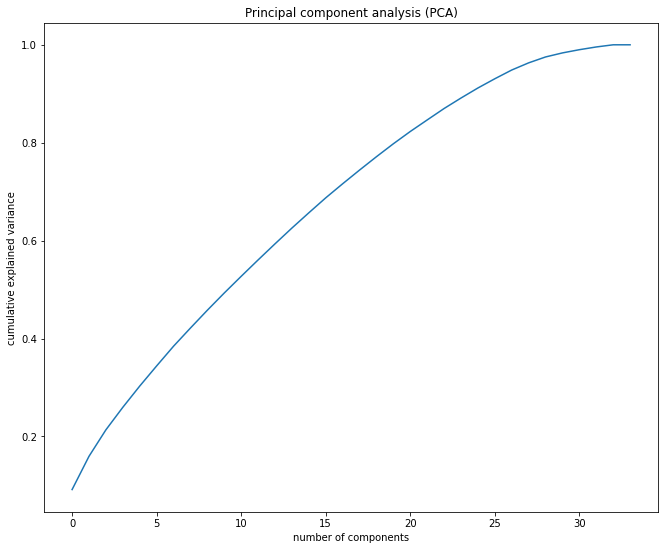

In [87]:
#Principal component analysis (PCA)
#Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Principal component analysis (PCA)')

This curve quantifies how much of the total, 33 dimensional variance is contained within the first n components. The first 17 components contain approximately 75% of the variance, while we need all 33 components to describe close to 100% of the variance.
To reatin 90% of the variance we need about 25 components.

C:\Users\elena\anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\elena\anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:1676: UserWarning:

`shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.

C:\Users\elena\anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\elena\anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:1676: UserWarning:

`shade_lowest` is now deprecated in favor of `th

Text(0.5, 1.0, 'Principal component analysis')

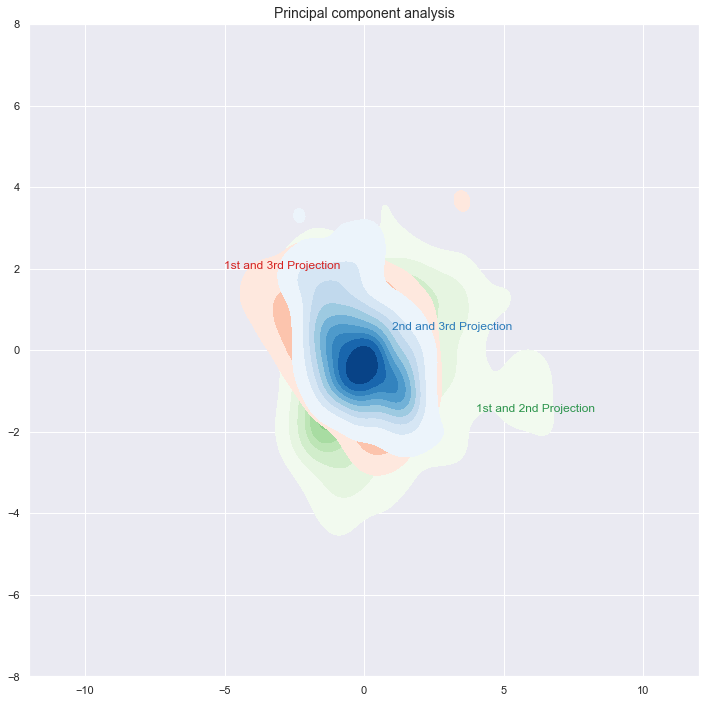

In [88]:
#https://www.machinelearningplus.com/machine-learning/principal-components-analysis-pca-better-explained/
sklearn_pca=PCA()
X_Train=sklearn_pca.fit_transform(X_train_scaled)
sns.set(style='darkgrid')
f, ax = plt.subplots(figsize=(12, 12))
ax = sns.kdeplot(X_Train[:,0], X_Train[:,1], cmap="Greens",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,1], X_Train[:,2], cmap="Reds",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(X_Train[:,2], X_Train[:,3], cmap="Blues",
          shade=True, shade_lowest=False)
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(1, 0.5, "2nd and 3rd Projection", size=12, color=blue)
ax.text(-5, 2, "1st and 3rd Projection", size=12, color=red)
ax.text(4, -1.5, "1st and 2nd Projection", size=12, color=green)
plt.xlim(-12,12)
plt.ylim(-8,8)
plt.title('Principal component analysis', size=14)

In [89]:
X_train = X2
y_train = y2

In [90]:
# split the dataset into traning and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
print('dim(X_train) = ', X_train.shape)
print('dim(X_test) = ', X_test.shape)

dim(X_train) =  (557, 34)
dim(X_test) =  (240, 34)


In [91]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
RFR = RandomForestRegressor(n_estimators = 200, criterion='mse', n_jobs = -1, random_state=42)
RFR.fit(X_train, y_train)
RFR_mse = np.sqrt(mean_squared_error(y_test, RFR.predict(X_test)))
RFR_mae = mean_absolute_error(y_test, RFR.predict(X_test))
RFR_rmse = r2_score(y_test, RFR.predict(X_test))
print('Random Forest Regression - MSE = ', RFR_mse)
print('Random Forest Regression - MAE = ', RFR_mae)
print('Random Forest Regression - R^2 = ', RFR_rmse)

Random Forest Regression - MSE =  48.35198207169036
Random Forest Regression - MAE =  27.098433035714287
Random Forest Regression - R^2 =  0.7562484035469077


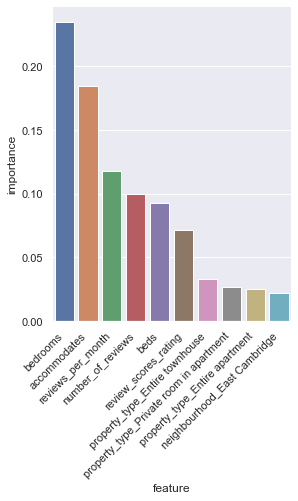

In [92]:
#Feature importancies
importances = RFR.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result_sort = tree_result.sort_values(by='importance',ascending=False)[:10]
chart = sns.catplot(x='feature', y='importance', kind='bar', data=tree_result_sort)
chart.set_xticklabels(rotation=45, horizontalalignment='right')
